In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from pathlib import Path

In [ ]:
# export
class Options():
    def __init__(self):
        # paths
        self.data_path = Path('data')
        self.model_path = Path('model')
        
        # train options
        self.actions = 'All'
        self.attempt_id = '01'
        self.attempt_path = Path('model')/self.attempt_id
        
        self.load_ckpt = False
        
        # train hyper-params
        self.bs = 128
        self.epochs = 10
        self.lr = 1e-3
        
        # model hyper-params
        self.size = 1024
        self.stages = 2
        self.dropout = 0.5

In [ ]:
# export
options = Options()

In [ ]:
train_loss_lists = []
for i in range(options.epochs):
    tll = torch.load(options.attempt_path/f'train_loss_list_e{i}.pt')
    print(np.mean(tll))
    train_loss_lists.append(tll)

0.14970600270755904
0.07525452856667157
0.06601756414187311
0.06194997761424844
0.06021508343833265
0.059299225053352105
0.05879475238269701
0.058564195222938646
0.05842938672781147
0.05839051824199406


In [ ]:
test_loss_lists = []
for i in range(options.epochs):
    tll = torch.load(options.attempt_path/f'test_loss_list_e{i}.pt')
    print(np.mean(tll))
    test_loss_lists.append(tll)

0.05828409053074384
0.04996376345518618
0.046002125642892376
0.04507989156536623
0.043278035388022024
0.04382986145055936
0.04366219976634612
0.04271084520496473
0.043402563580296684
0.043738594483488914


In [ ]:
train_lls = np.hstack(train_loss_lists)
test_lls = np.hstack(test_loss_lists)

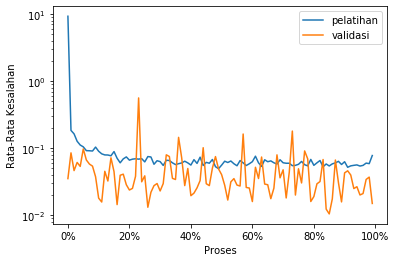

In [ ]:
train_idx = np.linspace(0, len(train_lls)-1, 100).astype(int)
train_relax = train_lls[train_idx]

test_idx = np.linspace(0, len(test_lls)-1, 100).astype(int)
test_relax = test_lls[test_idx]

plt.yscale("log")
plt.ylabel("Rata-Rata Kesalahan")
plt.xlabel("Proses")

plt.plot(train_relax, label="pelatihan")
plt.plot(test_relax, label="validasi")

plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()]) 

plt.legend()
plt.savefig("brrr.jpg", dpi=100)
plt.show()